# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                               
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation'
                                            )

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [9]:
model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=32, kernel_size=4, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=1024, kernel_size=2, strides=1,kernel_initializer = 'random_normal',padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Dropout(0.2))

model.add(GlobalAveragePooling2D())
model.add(Dense(196, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)       32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 512)       262656    
__________

### Train

In [10]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 200

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch32.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=185,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=74,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Epoch 1/200
185/185 [==============================] - 114s 616ms/step - loss: 5.2341 - acc: 0.0079 - val_loss: 5.1890 - val_acc: 0.0119

Epoch 00001: val_loss improved from inf to 5.18898, saving model to Saved_Models/weights.best.from_scratch32.hdf5
Epoch 2/200
185/185 [==============================] - 108s 585ms/step - loss: 5.1616 - acc: 0.0133 - val_loss: 5.1249 - val_acc: 0.0175

Epoch 00002: val_loss improved from 5.18898 to 5.12488, saving model to Saved_Models/weights.best.from_scratch32.hdf5
Epoch 3/200
185/185 [==============================] - 109s 587ms/step - loss: 5.1154 - acc: 0.0167 - val_loss: 5.1490 - val_acc: 0.0196

Epoch 00003: val_loss did not improve from 5.12488
Epoch 4/200
185/185 [==============================] - 108s 584ms/step - loss: 5.0928 - acc: 0.0201 - val_loss: 5.1158 - val_acc: 0.0239

Epoch 00004: val_loss improved from 5.12488 to 5.11584, saving model to Saved_Models/weights.best.from_scratch32.hdf5
Epoch 5/200
185/185 [==========================

185/185 [==============================] - 107s 577ms/step - loss: 3.8510 - acc: 0.1594 - val_loss: 4.5166 - val_acc: 0.1052

Epoch 00037: val_loss did not improve from 4.51095
Epoch 38/200
185/185 [==============================] - 108s 581ms/step - loss: 3.8187 - acc: 0.1613 - val_loss: 4.5269 - val_acc: 0.1039

Epoch 00038: val_loss did not improve from 4.51095
Epoch 39/200
185/185 [==============================] - 107s 579ms/step - loss: 3.7763 - acc: 0.1747 - val_loss: 4.5505 - val_acc: 0.1133

Epoch 00039: val_loss did not improve from 4.51095
Epoch 40/200
185/185 [==============================] - 106s 575ms/step - loss: 3.7312 - acc: 0.1721 - val_loss: 4.5041 - val_acc: 0.1107

Epoch 00040: val_loss improved from 4.51095 to 4.50410, saving model to Saved_Models/weights.best.from_scratch32.hdf5
Epoch 41/200
185/185 [==============================] - 107s 579ms/step - loss: 3.6905 - acc: 0.1878 - val_loss: 4.5998 - val_acc: 0.0890

Epoch 00041: val_loss did not improve from 4.50

185/185 [==============================] - 107s 580ms/step - loss: 2.3552 - acc: 0.4260 - val_loss: 4.8806 - val_acc: 0.1750

Epoch 00079: val_loss did not improve from 4.36127
Epoch 80/200
185/185 [==============================] - 107s 580ms/step - loss: 2.3554 - acc: 0.4186 - val_loss: 4.6116 - val_acc: 0.1767

Epoch 00080: val_loss did not improve from 4.36127
Epoch 81/200
185/185 [==============================] - 107s 578ms/step - loss: 2.3287 - acc: 0.4302 - val_loss: 4.7872 - val_acc: 0.1644

Epoch 00081: val_loss did not improve from 4.36127
Epoch 82/200
185/185 [==============================] - 107s 581ms/step - loss: 2.3059 - acc: 0.4345 - val_loss: 4.7640 - val_acc: 0.1746

Epoch 00082: val_loss did not improve from 4.36127
Epoch 83/200
185/185 [==============================] - 107s 579ms/step - loss: 2.2342 - acc: 0.4448 - val_loss: 4.7779 - val_acc: 0.2061

Epoch 00083: val_loss did not improve from 4.36127
Epoch 84/200
185/185 [==============================] - 107s 57

185/185 [==============================] - 107s 579ms/step - loss: 1.5119 - acc: 0.6090 - val_loss: 6.7645 - val_acc: 0.1644

Epoch 00122: val_loss did not improve from 4.36127
Epoch 123/200
185/185 [==============================] - 107s 578ms/step - loss: 1.4974 - acc: 0.6100 - val_loss: 5.1375 - val_acc: 0.2419

Epoch 00123: val_loss did not improve from 4.36127
Epoch 124/200
185/185 [==============================] - 107s 579ms/step - loss: 1.4529 - acc: 0.6231 - val_loss: 5.3613 - val_acc: 0.2266

Epoch 00124: val_loss did not improve from 4.36127
Epoch 125/200
185/185 [==============================] - 107s 577ms/step - loss: 1.4390 - acc: 0.6243 - val_loss: 5.1672 - val_acc: 0.2411

Epoch 00125: val_loss did not improve from 4.36127
Epoch 126/200
185/185 [==============================] - 107s 579ms/step - loss: 1.4530 - acc: 0.6182 - val_loss: 5.1147 - val_acc: 0.2364

Epoch 00126: val_loss did not improve from 4.36127
Epoch 127/200
185/185 [==============================] - 10

185/185 [==============================] - 108s 582ms/step - loss: 1.1285 - acc: 0.6987 - val_loss: 6.0000 - val_acc: 0.2291

Epoch 00165: val_loss did not improve from 4.36127
Epoch 166/200
185/185 [==============================] - 107s 577ms/step - loss: 1.1034 - acc: 0.7081 - val_loss: 6.1913 - val_acc: 0.2449

Epoch 00166: val_loss did not improve from 4.36127
Epoch 167/200
185/185 [==============================] - 107s 580ms/step - loss: 1.0958 - acc: 0.7118 - val_loss: 6.0115 - val_acc: 0.2389

Epoch 00167: val_loss did not improve from 4.36127
Epoch 168/200
185/185 [==============================] - 107s 579ms/step - loss: 1.1113 - acc: 0.7059 - val_loss: 5.4879 - val_acc: 0.2402

Epoch 00168: val_loss did not improve from 4.36127
Epoch 169/200
185/185 [==============================] - 107s 581ms/step - loss: 1.0980 - acc: 0.7147 - val_loss: 5.7391 - val_acc: 0.2496

Epoch 00169: val_loss did not improve from 4.36127
Epoch 170/200
185/185 [==============================] - 10

In [11]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0.0,5.188983,0.011925,5.236796,0.007977
1,1.0,5.124876,0.017462,5.161442,0.013408
2,2.0,5.148975,0.019591,5.114022,0.016802
3,3.0,5.115836,0.023850,5.092325,0.020197
4,4.0,5.065321,0.021721,5.047294,0.023761
5,5.0,5.031662,0.027683,5.015740,0.023252
6,6.0,5.051119,0.026405,4.992546,0.025119
7,7.0,5.013591,0.025980,4.953766,0.027325
8,8.0,4.998687,0.029813,4.937214,0.031229
9,9.0,4.969462,0.028961,4.918148,0.031738


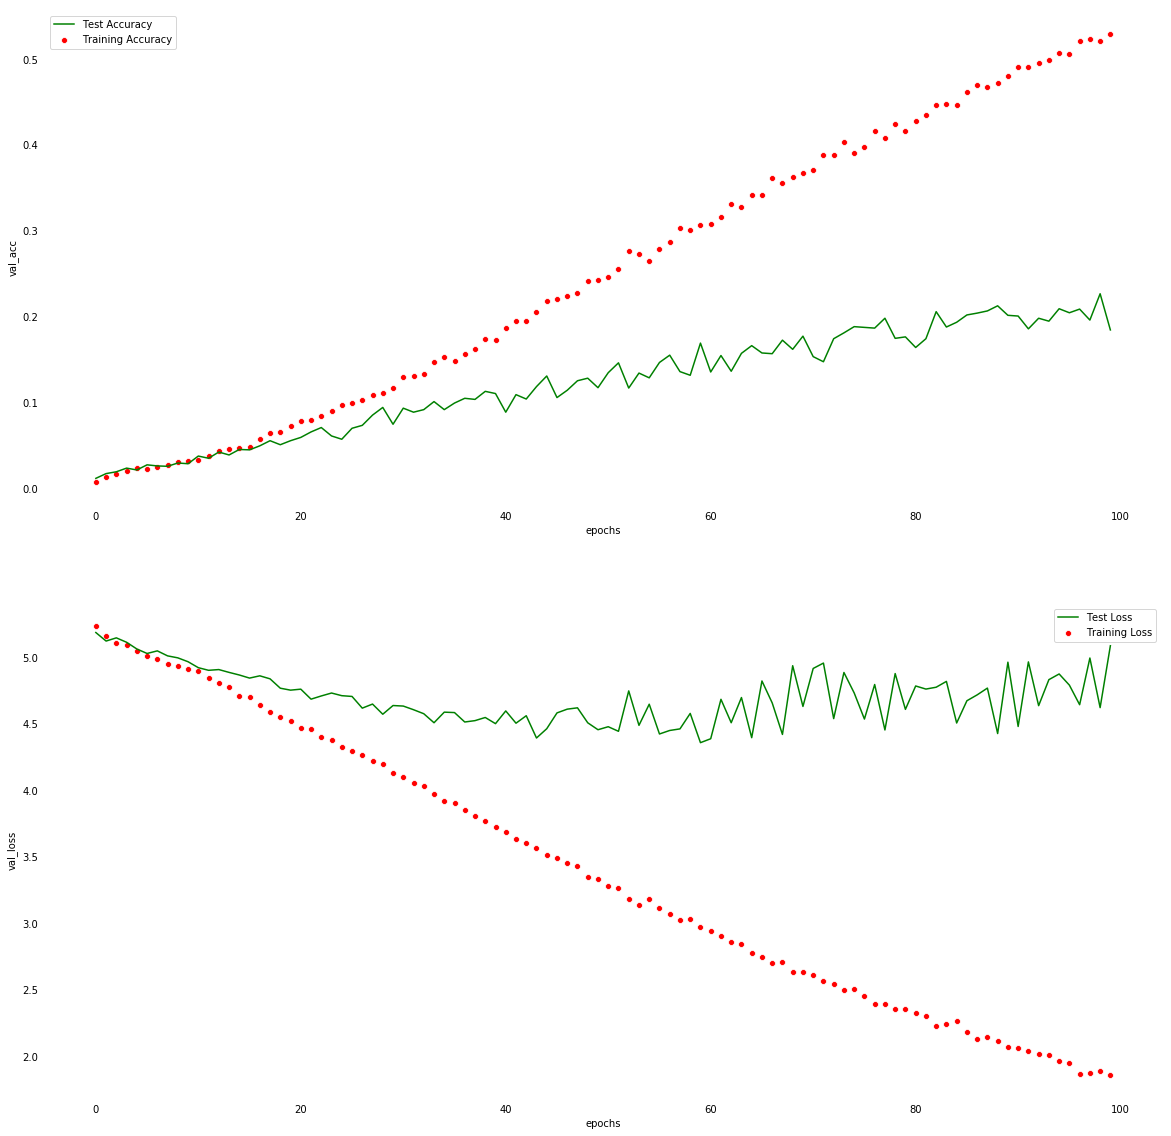

In [12]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters